# Bellman Ford algorithm
### Single Source Shortest Path

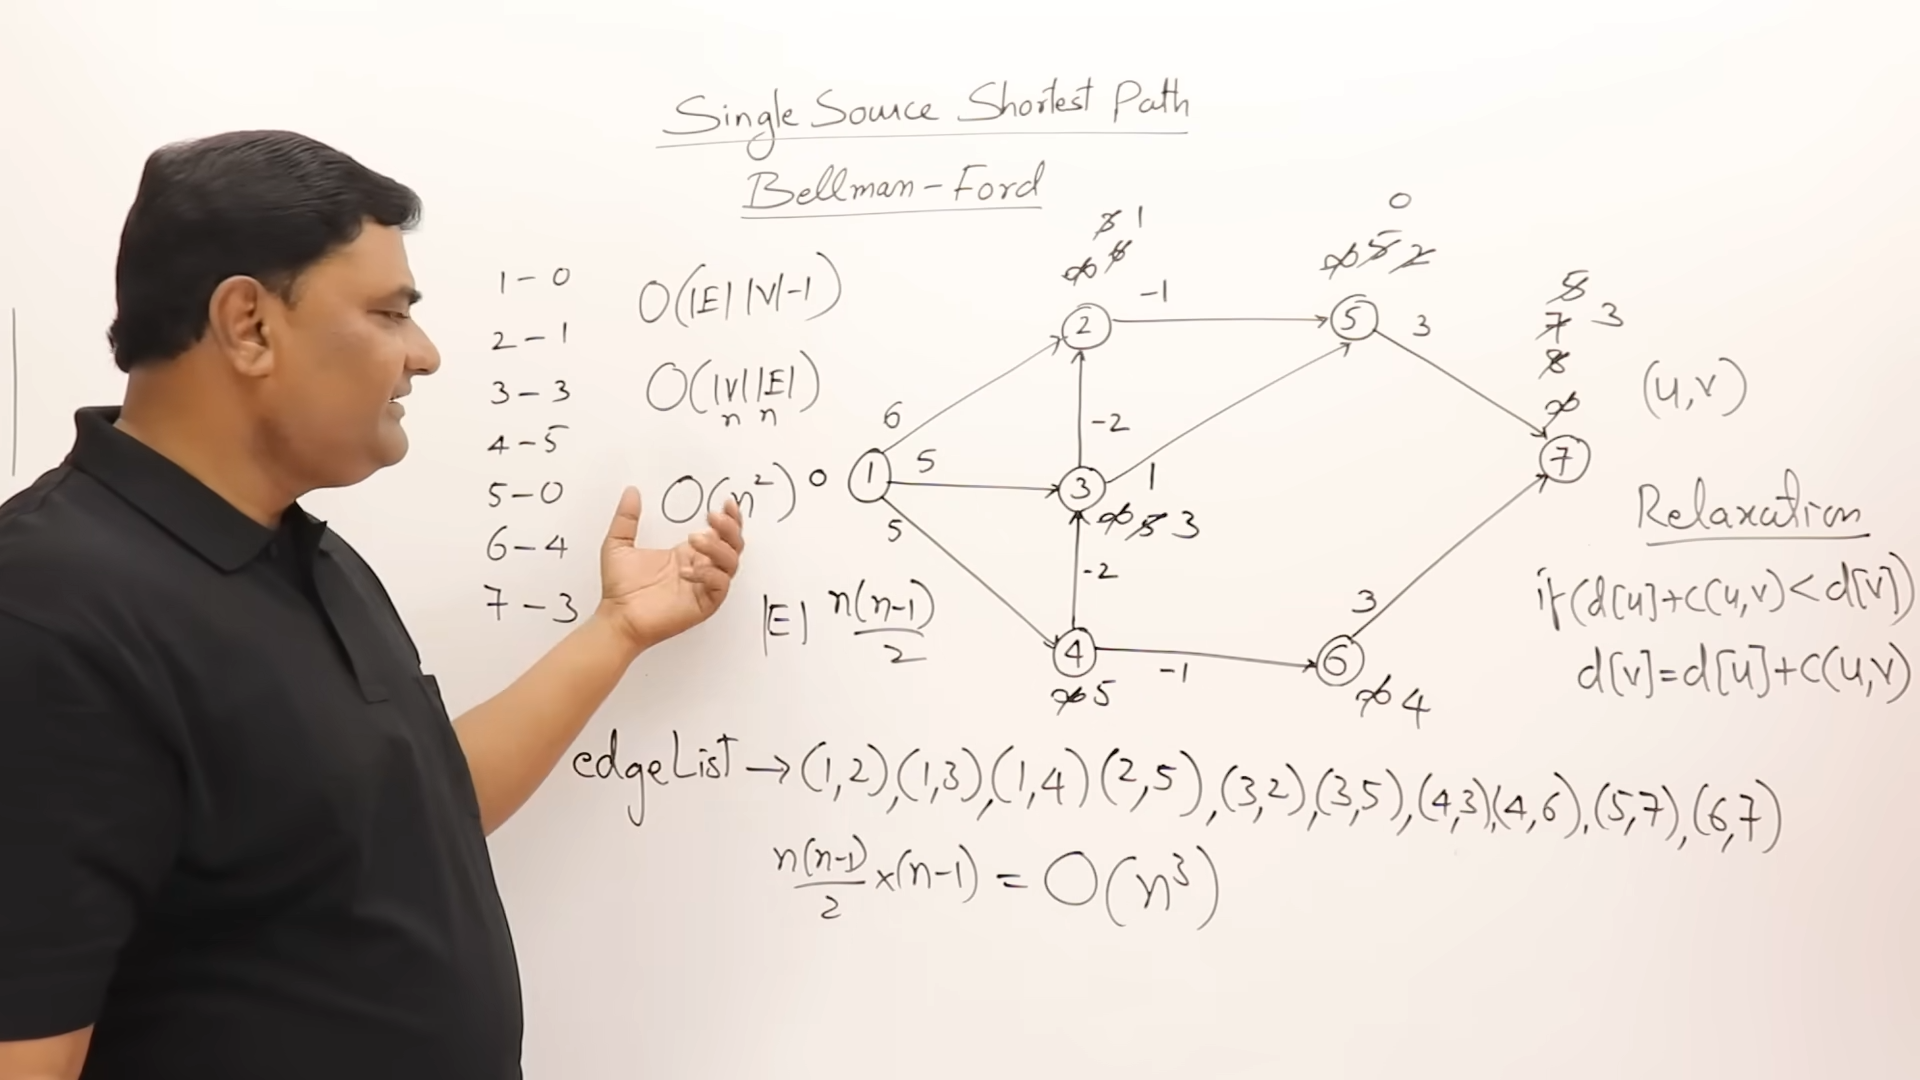

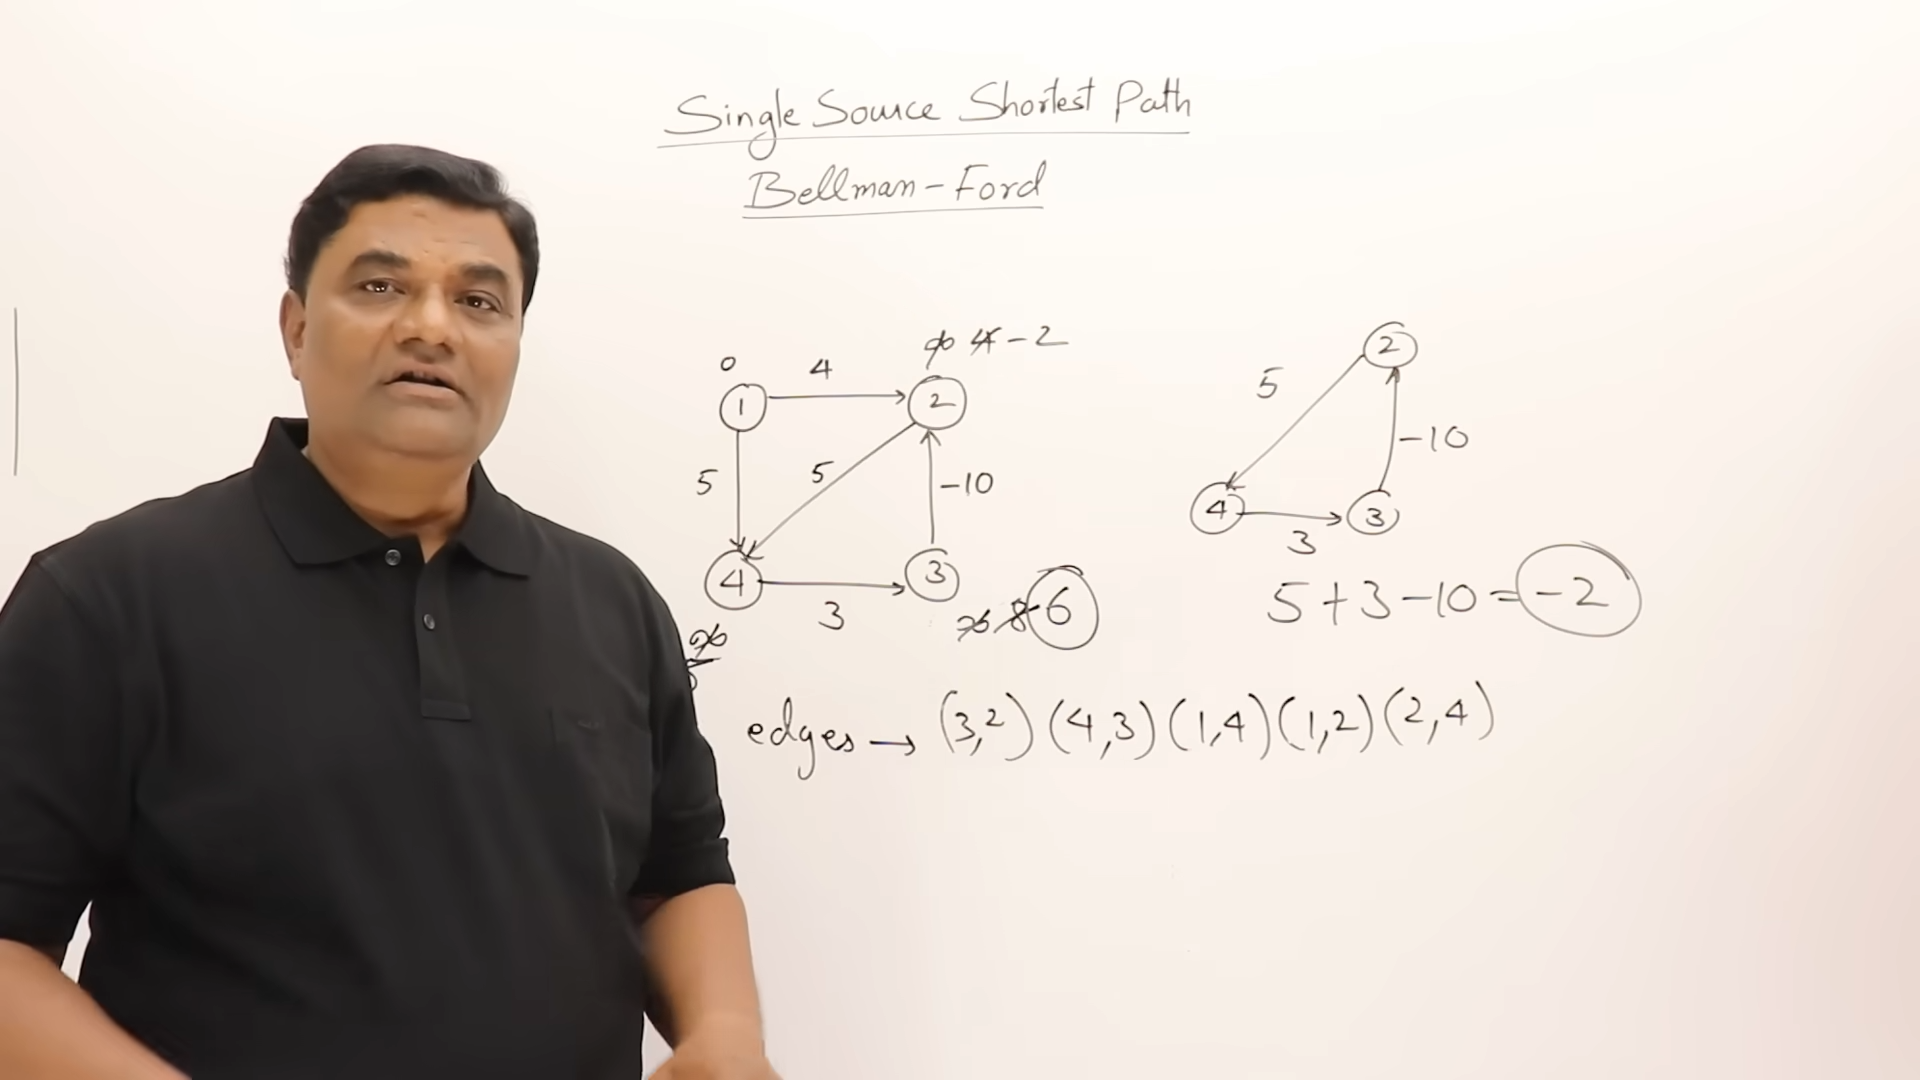

In [3]:
infinity = float("inf")


def make_graph():
    # tuple = (cost, to_node)
    return {
        'S': [(6, 'A'), (5, 'B'), (5,'C')],
        'A': [(-1, 'D')],
        'B': [(-2, 'A'), (1, 'D')],
        'C': [(-2, 'B'), (-1, 'E')],
        'D': [(3, 'F')],
        'E': [(3, 'F')],
        'F': [],
    }

def make_graph_with_negative_cycle():
    return {
        'S': [(4, 'A'), (5,'C')],
        'A': [(5, 'C')],
        'B': [(-10, 'A')],
        'C': [(3, 'B')],
    }

def bellman_ford(G, start):
    shortest_paths = {}
    
    for node in G:
        shortest_paths[node] = infinity

    shortest_paths[start] = 0
    size = len(G)

    for _ in range(size - 1):
        for node in G:
            for edge in G[node]:
                cost = edge[0]
                to_node = edge[1]
                if shortest_paths[node] + cost < shortest_paths[to_node]:
                    shortest_paths[to_node] = shortest_paths[node] + cost

    # iterate once more and check for negative cycle
    for node in G:
        for edge in G[node]:
            cost = edge[0]
            to_node = edge[1]
            if shortest_paths[node] + cost < shortest_paths[to_node]:
                return 'INVALID - negative cycle detected'

    return shortest_paths

def main():
    start = 'S'

    G = make_graph()
    shortest_paths = bellman_ford(G, start)
    print(f'Shortest path from {start}: {shortest_paths}')

    G = make_graph_with_negative_cycle()
    negative_cycle = bellman_ford(G, start)
    print(f'Shortest path from {start}: {negative_cycle}')
main()

Shortest path from S: {'S': 0, 'A': 1, 'B': 3, 'C': 5, 'D': 0, 'E': 4, 'F': 3}
Shortest path from S: INVALID - negative cycle detected
